In [258]:
import astropy.io.fits as fits
import numpy as np
from astropy.table import unique,Table,setdiff,hstack,join,QTable,vstack
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt
import warnings
from scipy.stats import sem
from scipy import stats
from astropy import units as u
from scipy.optimize import curve_fit
import random

SMALL_SIZE = 10
MEDIUM_SIZE = 12
BIGGER_SIZE = 14

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=11)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [2]:
g09 = Table.read('/suphys/fscu5535/HSC_work/mod_data/G09_reals_zlt0.125_20Mpc_5REmin.fits')
g09rands = Table.read('/import/silo5/fscu5535/HSC_work/mod_data/G09_rands_rev_0.125_20Mpc_25xrand_5REmin.fits')
g09.info()
g09rands.info()

g12 = Table.read('/suphys/fscu5535/HSC_work/mod_data/G12_reals_zlt0.125_20Mpc_5REmin.fits')
g12rands = Table.read('/import/silo5/fscu5535/HSC_work/mod_data/G12_rands_rev_0.125_20Mpc_25xrand_5REmin.fits')
g12.info()
g12rands.info()

g15 = Table.read('/suphys/fscu5535/HSC_work/mod_data/G15_reals_zlt0.125_20Mpc_5REmin.fits')
g15rands = Table.read('/import/silo5/fscu5535/HSC_work/mod_data/G15_rands_rev_0.125_20Mpc_25xrand_5REmin.fits')
g15.info()
g15rands.info()

# combined = Table.read('/import/silo5/fscu5535/HSC_work/mod_data/allsamirealrand0.125_20Mpc_25xrand_5REmin.fits')
# combined.info()


<Table length=676>
    name     dtype   shape      class      n_bad  
----------- ------- -------- ------------ --------
      CATID   int64                Column        0
RE_CIRC_KPC float64                Column        0
   DISTANCE float64 (51000,) MaskedColumn 12044809
<Table length=676>
     name      dtype    shape       class       n_bad  
------------- ------- ---------- ------------ ---------
        CATID   int64                  Column         0
           RA float64                  Column         0
          DEC float64                  Column         0
            Z float64                  Column         0
RAND_DISTANCE float64 (1275000,) MaskedColumn 299587522
<Table length=732>
    name     dtype   shape      class      n_bad 
----------- ------- -------- ------------ -------
      CATID   int64                Column       0
RE_CIRC_KPC float64                Column       0
   DISTANCE float64 (51000,) MaskedColumn 8532774
<Table length=732>
     name      dtype    sha

In [3]:
g09comb = join(g09,g09rands,keys='CATID',join_type='left')
g12comb = join(g12,g12rands,keys='CATID',join_type='left')
g15comb = join(g15,g15rands,keys='CATID',join_type='left')
g09comb.info()
g12comb.info()
g15comb.info()

<Table length=676>
     name      dtype    shape       class       n_bad  
------------- ------- ---------- ------------ ---------
        CATID   int64                  Column         0
  RE_CIRC_KPC float64                  Column         0
     DISTANCE float64   (51000,) MaskedColumn  12044809
           RA float64                  Column         0
          DEC float64                  Column         0
            Z float64                  Column         0
RAND_DISTANCE float64 (1275000,) MaskedColumn 299587522
<Table length=732>
     name      dtype    shape       class       n_bad  
------------- ------- ---------- ------------ ---------
        CATID   int64                  Column         0
  RE_CIRC_KPC float64                  Column         0
     DISTANCE float64   (51000,) MaskedColumn   8532774
           RA float64                  Column         0
          DEC float64                  Column         0
            Z float64                  Column         0
RAND_DISTA

In [4]:
combined = vstack([g09comb,g12comb,g15comb])
combined.info()

<Table length=2153>
     name      dtype    shape       class       n_bad  
------------- ------- ---------- ------------ ---------
        CATID   int64                  Column         0
  RE_CIRC_KPC float64                  Column         0
     DISTANCE float64   (51000,) MaskedColumn  31894203
           RA float64                  Column         0
          DEC float64                  Column         0
            Z float64                  Column         0
RAND_DISTANCE float64 (1275000,) MaskedColumn 814401197


In [5]:
combined.write('/import/silo5/fscu5535/HSC_work/mod_data/allsamirealrand0.125_20Mpc_25xrand_5REmin.fits',overwrite=True)

In [6]:
print(g09['CATID'][675])

3913888


In [7]:
print(combined['CATID'][675])

3913888


In [9]:
for i in range(len(g15)):
    if combined['CATID'][i+1408] != g15['CATID'][i]:
        print("UHOH!")
        
# so catids line up

In [10]:
FIELDS = []

for i in range(len(combined)):
    if i <= 675:
        FIELDS.append('G09')
    elif i <= 1407:
        FIELDS.append('G12')
    else:
        FIELDS.append('G15')

In [11]:
combined['FIELD'] = FIELDS

In [12]:
combined.write('/import/silo5/fscu5535/HSC_work/mod_data/allsamirealrand0.125_20Mpc_25xrand_5REmin.fits',overwrite=True)

In [13]:
combined[-1]


CATID,RE_CIRC_KPC,DISTANCE,RA,DEC,Z,RAND_DISTANCE,FIELD
int64,float64,float64[51000],float64,float64,float64,float64[1275000],str3
718921,0.7637231945991516,19.5135210956133 .. --,217.2773895263672,1.2850290536880493,0.08647000044584274,19.808226756868606 .. --,G15


In [14]:
g15rands[-1]

CATID,RA,DEC,Z,RAND_DISTANCE
int64,float64,float64,float64,float64[1275000]
718921,217.2773895263672,1.2850290536880493,0.08647000044584274,19.808226756868606 .. --


In [15]:
combined.info()
#####################

<Table length=2153>
     name      dtype    shape       class       n_bad  
------------- ------- ---------- ------------ ---------
        CATID   int64                  Column         0
  RE_CIRC_KPC float64                  Column         0
     DISTANCE float64   (51000,) MaskedColumn  31894203
           RA float64                  Column         0
          DEC float64                  Column         0
            Z float64                  Column         0
RAND_DISTANCE float64 (1275000,) MaskedColumn 814401197
        FIELD    str3                  Column         0


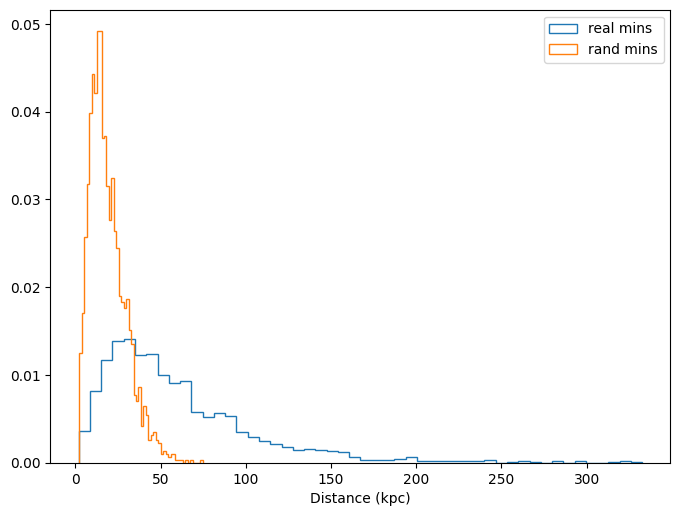

In [13]:
minrealdists = np.zeros(2153)
minranddists = np.zeros(2153)

for i in range(len(combined)):
    minrealdists[i] = np.min(combined['DISTANCE'][i])
    minranddists[i] = np.min(combined['RAND_DISTANCE'][i])
    
plt.figure(figsize=(8,6),dpi=100)
plt.hist(minrealdists*1000,bins=50,label="real mins",fill=False,histtype="step",density=True)
plt.hist(minranddists*1000,bins=50,label="rand mins",fill=False,histtype="step",density=True)
plt.xlabel("Distance (kpc)")
plt.legend()
    

In [18]:
HSC_G09_gals = Table.read('/suphys/fscu5535/HSC_work/mod_data/G09_HSC_galaxies.fits')
HSC_G12_gals = Table.read('/suphys/fscu5535/HSC_work/mod_data/G12_HSC_galaxies.fits')
HSC_G15_gals = Table.read('/suphys/fscu5535/HSC_work/mod_data/G15_HSC_galaxies.fits')

SAMI_G09_gals = Table.read('/suphys/fscu5535/HSC_work/mod_data/G09_sami_1.4.fits')
SAMI_G12_gals = Table.read('/suphys/fscu5535/HSC_work/mod_data/G12_sami_1.0.fits')
SAMI_G15_gals = Table.read('/suphys/fscu5535/HSC_work/mod_data/G15_sami_1.0.fits')


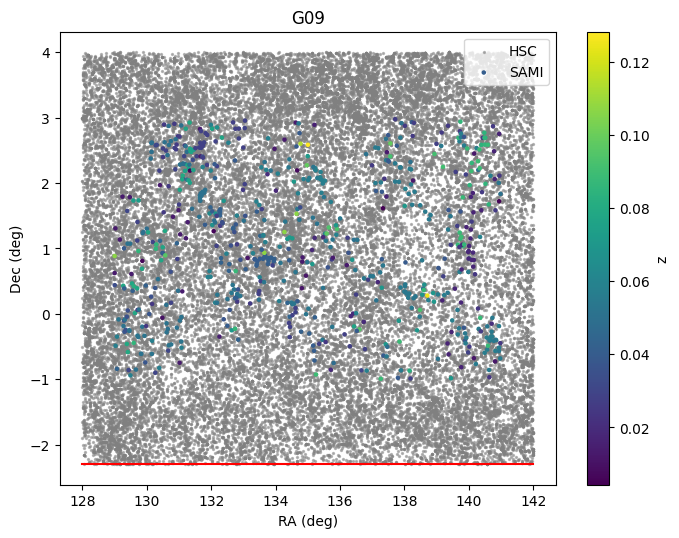

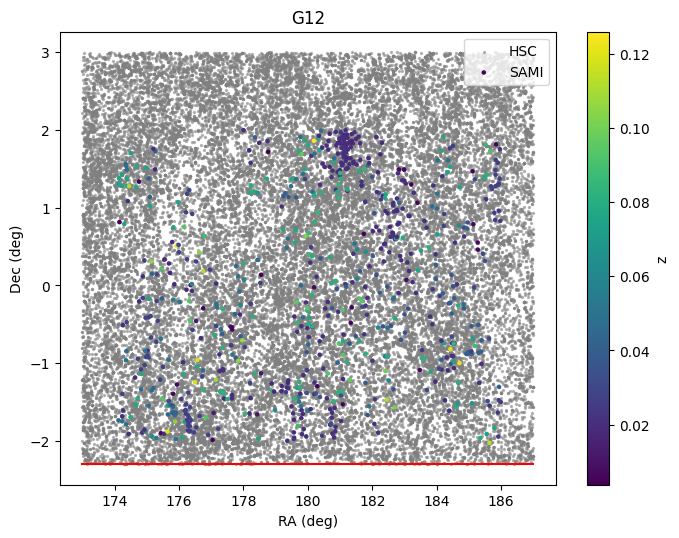

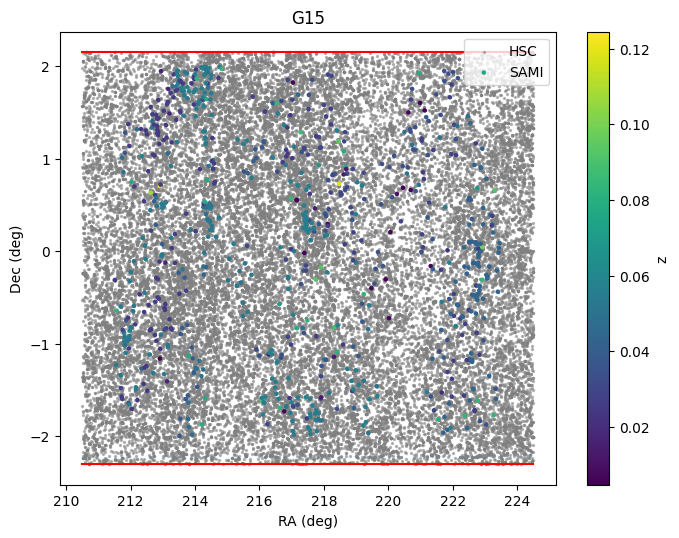

In [19]:
plt.figure(figsize=(8,6),dpi=100)
plt.scatter(HSC_G09_gals['ra'],HSC_G09_gals['dec'],label="HSC",s=2,c='grey',alpha=0.5)
plt.scatter(SAMI_G09_gals['RA'],SAMI_G09_gals['DEC'],label="SAMI",c=SAMI_G09_gals['Z_SPEC'],s=5)
cb=plt.colorbar()
cb.set_label('z')
plt.xlabel('RA (deg)')
plt.ylabel('Dec (deg)')
plt.plot((128,142),(-2.3,-2.3),c='r')
plt.legend(loc="upper right")
plt.title("G09")

filename = "/suphys/fscu5535/HSC_work/figures/hscsamiG09fixed.png"
plt.savefig(filename, bbox_inches='tight', pad_inches=0.3, dpi = 250) 

plt.figure(figsize=(8,6),dpi=100)
plt.scatter(HSC_G12_gals['ra'],HSC_G12_gals['dec'],label="HSC",s=2,c='grey',alpha=0.5)
plt.scatter(SAMI_G12_gals['RA'],SAMI_G12_gals['DEC'],label="SAMI",c=SAMI_G12_gals['Z_SPEC'],s=5)
cb=plt.colorbar()
cb.set_label('z')
plt.xlabel('RA (deg)')
plt.ylabel('Dec (deg)')
plt.plot((173,187),(-2.3,-2.3),c='r')
plt.legend(loc="upper right")
plt.title("G12")

filename = "/suphys/fscu5535/HSC_work/figures/hscsamiG12fixed.png"
plt.savefig(filename, bbox_inches='tight', pad_inches=0.3, dpi = 250) 

plt.figure(figsize=(8,6),dpi=100)
plt.scatter(HSC_G15_gals['ra'],HSC_G15_gals['dec'],label="HSC",s=2,c='grey',alpha=0.5)
plt.scatter(SAMI_G15_gals['RA'],SAMI_G15_gals['DEC'],label="SAMI",c=SAMI_G15_gals['Z_SPEC'],s=5)
cb=plt.colorbar()
cb.set_label('z')
plt.xlabel('RA (deg)')
plt.ylabel('Dec (deg)')
plt.plot((210.5,224.5),(2.15,2.15),c='r')
plt.plot((210.5,224.5),(-2.3,-2.3),c='r')
plt.legend(loc="upper right")
plt.title("G15")

filename = "/suphys/fscu5535/HSC_work/figures/hscsamiG15fixed.png"
plt.savefig(filename, bbox_inches='tight', pad_inches=0.3, dpi = 250) 



50 binwdith done
100 binwdith done
200 binwdith done
500 binwdith done
1000 binwdith done
<Table length=2153>
     name      dtype    shape       class       n_bad  
------------- ------- ---------- ------------ ---------
        CATID   int64                  Column         0
  RE_CIRC_KPC float64                  Column         0
     DISTANCE float64   (51000,) MaskedColumn  31894203
           RA float64                  Column         0
          DEC float64                  Column         0
            Z float64                  Column         0
RAND_DISTANCE float64 (1275000,) MaskedColumn 814401197
        FIELD    str3                  Column         0
         xi50 float64     (400,)       Column         0
        xi100 float64     (200,)       Column         0
        xi200 float64     (100,)       Column         0
        xi500 float64      (40,)       Column         0
       xi1000 float64      (20,)       Column         0


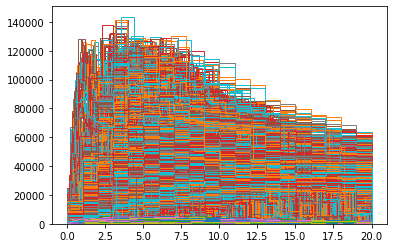

In [16]:
searchradius = 20000
binwidth = [50,100,200,500,1000]

for k in binwidth:

    ratios = np.zeros(searchradius//k)

    for j in range(len(combined)):
        n_real,bin_real,patches = plt.hist(combined['DISTANCE'][j],bins=searchradius//k,
                                                              histtype='step',fill=False)

        n_rand,bin_rand,patches = plt.hist(combined['RAND_DISTANCE'][j],bins=searchradius//k,
                                                              histtype='step',fill=False)

        ratio = (n_real / n_rand)*25
        ratios = np.vstack((ratios,ratio))

    # clean up, remove zeros row
    ratios = np.delete(ratios,0,0)
    xis = ratios-1
    combined['xi{}'.format(k)] = xis
    
    print(k,"binwdith done")
    
    
combined.info()

0 / 2153
1 / 2153
2 / 2153
3 / 2153
4 / 2153
5 / 2153
6 / 2153
7 / 2153
8 / 2153
9 / 2153
10 / 2153
11 / 2153
12 / 2153
13 / 2153
14 / 2153
15 / 2153
16 / 2153
17 / 2153
18 / 2153
19 / 2153
20 / 2153
21 / 2153
22 / 2153
23 / 2153
24 / 2153
25 / 2153
26 / 2153
27 / 2153
28 / 2153
29 / 2153
30 / 2153
31 / 2153
32 / 2153
33 / 2153
34 / 2153
35 / 2153
36 / 2153
37 / 2153
38 / 2153
39 / 2153
40 / 2153
41 / 2153
42 / 2153
43 / 2153
44 / 2153
45 / 2153
46 / 2153
47 / 2153
48 / 2153
49 / 2153
50 / 2153
51 / 2153
52 / 2153
53 / 2153
54 / 2153
55 / 2153
56 / 2153
57 / 2153
58 / 2153
59 / 2153
60 / 2153
61 / 2153
62 / 2153
63 / 2153
64 / 2153
65 / 2153
66 / 2153
67 / 2153
68 / 2153
69 / 2153
70 / 2153
71 / 2153
72 / 2153
73 / 2153
74 / 2153
75 / 2153
76 / 2153
77 / 2153
78 / 2153
79 / 2153
80 / 2153
81 / 2153
82 / 2153
83 / 2153
84 / 2153
85 / 2153
86 / 2153
87 / 2153
88 / 2153
89 / 2153
90 / 2153
91 / 2153
92 / 2153
93 / 2153
94 / 2153
95 / 2153
96 / 2153
97 / 2153
98 / 2153
99 / 2153
100 / 2153

755 / 2153
756 / 2153
757 / 2153
758 / 2153
759 / 2153
760 / 2153
761 / 2153
762 / 2153
763 / 2153
764 / 2153
765 / 2153
766 / 2153
767 / 2153
768 / 2153
769 / 2153
770 / 2153
771 / 2153
772 / 2153
773 / 2153
774 / 2153
775 / 2153
776 / 2153
777 / 2153
778 / 2153
779 / 2153
780 / 2153
781 / 2153
782 / 2153
783 / 2153
784 / 2153
785 / 2153
786 / 2153
787 / 2153
788 / 2153
789 / 2153
790 / 2153
791 / 2153
792 / 2153
793 / 2153
794 / 2153
795 / 2153
796 / 2153
797 / 2153
798 / 2153
799 / 2153
800 / 2153
801 / 2153
802 / 2153
803 / 2153
804 / 2153
805 / 2153
806 / 2153
807 / 2153
808 / 2153
809 / 2153
810 / 2153
811 / 2153
812 / 2153
813 / 2153
814 / 2153
815 / 2153
816 / 2153
817 / 2153
818 / 2153
819 / 2153
820 / 2153
821 / 2153
822 / 2153
823 / 2153
824 / 2153
825 / 2153
826 / 2153
827 / 2153
828 / 2153
829 / 2153
830 / 2153
831 / 2153
832 / 2153
833 / 2153
834 / 2153
835 / 2153
836 / 2153
837 / 2153
838 / 2153
839 / 2153
840 / 2153
841 / 2153
842 / 2153
843 / 2153
844 / 2153
845 / 2153

1462 / 2153
1463 / 2153
1464 / 2153
1465 / 2153
1466 / 2153
1467 / 2153
1468 / 2153
1469 / 2153
1470 / 2153
1471 / 2153
1472 / 2153
1473 / 2153
1474 / 2153
1475 / 2153
1476 / 2153
1477 / 2153
1478 / 2153
1479 / 2153
1480 / 2153
1481 / 2153
1482 / 2153
1483 / 2153
1484 / 2153
1485 / 2153
1486 / 2153
1487 / 2153
1488 / 2153
1489 / 2153
1490 / 2153
1491 / 2153
1492 / 2153
1493 / 2153
1494 / 2153
1495 / 2153
1496 / 2153
1497 / 2153
1498 / 2153
1499 / 2153
1500 / 2153
1501 / 2153
1502 / 2153
1503 / 2153
1504 / 2153
1505 / 2153
1506 / 2153
1507 / 2153
1508 / 2153
1509 / 2153
1510 / 2153
1511 / 2153
1512 / 2153
1513 / 2153
1514 / 2153
1515 / 2153
1516 / 2153
1517 / 2153
1518 / 2153
1519 / 2153
1520 / 2153
1521 / 2153
1522 / 2153
1523 / 2153
1524 / 2153
1525 / 2153
1526 / 2153
1527 / 2153
1528 / 2153
1529 / 2153
1530 / 2153
1531 / 2153
1532 / 2153
1533 / 2153
1534 / 2153
1535 / 2153
1536 / 2153
1537 / 2153
1538 / 2153
1539 / 2153
1540 / 2153
1541 / 2153
1542 / 2153
1543 / 2153
1544 / 2153
1545

2147 / 2153
2148 / 2153
2149 / 2153
2150 / 2153
2151 / 2153
2152 / 2153
100 binwidth done
0 / 2153
1 / 2153
2 / 2153
3 / 2153
4 / 2153
5 / 2153
6 / 2153
7 / 2153
8 / 2153
9 / 2153
10 / 2153
11 / 2153
12 / 2153
13 / 2153
14 / 2153
15 / 2153
16 / 2153
17 / 2153
18 / 2153
19 / 2153
20 / 2153
21 / 2153
22 / 2153
23 / 2153
24 / 2153
25 / 2153
26 / 2153
27 / 2153
28 / 2153
29 / 2153
30 / 2153
31 / 2153
32 / 2153
33 / 2153
34 / 2153
35 / 2153
36 / 2153
37 / 2153
38 / 2153
39 / 2153
40 / 2153
41 / 2153
42 / 2153
43 / 2153
44 / 2153
45 / 2153
46 / 2153
47 / 2153
48 / 2153
49 / 2153
50 / 2153
51 / 2153
52 / 2153
53 / 2153
54 / 2153
55 / 2153
56 / 2153
57 / 2153
58 / 2153
59 / 2153
60 / 2153
61 / 2153
62 / 2153
63 / 2153
64 / 2153
65 / 2153
66 / 2153
67 / 2153
68 / 2153
69 / 2153
70 / 2153
71 / 2153
72 / 2153
73 / 2153
74 / 2153
75 / 2153
76 / 2153
77 / 2153
78 / 2153
79 / 2153
80 / 2153
81 / 2153
82 / 2153
83 / 2153
84 / 2153
85 / 2153
86 / 2153
87 / 2153
88 / 2153
89 / 2153
90 / 2153
91 / 2153


747 / 2153
748 / 2153
749 / 2153
750 / 2153
751 / 2153
752 / 2153
753 / 2153
754 / 2153
755 / 2153
756 / 2153
757 / 2153
758 / 2153
759 / 2153
760 / 2153
761 / 2153
762 / 2153
763 / 2153
764 / 2153
765 / 2153
766 / 2153
767 / 2153
768 / 2153
769 / 2153
770 / 2153
771 / 2153
772 / 2153
773 / 2153
774 / 2153
775 / 2153
776 / 2153
777 / 2153
778 / 2153
779 / 2153
780 / 2153
781 / 2153
782 / 2153
783 / 2153
784 / 2153
785 / 2153
786 / 2153
787 / 2153
788 / 2153
789 / 2153
790 / 2153
791 / 2153
792 / 2153
793 / 2153
794 / 2153
795 / 2153
796 / 2153
797 / 2153
798 / 2153
799 / 2153
800 / 2153
801 / 2153
802 / 2153
803 / 2153
804 / 2153
805 / 2153
806 / 2153
807 / 2153
808 / 2153
809 / 2153
810 / 2153
811 / 2153
812 / 2153
813 / 2153
814 / 2153
815 / 2153
816 / 2153
817 / 2153
818 / 2153
819 / 2153
820 / 2153
821 / 2153
822 / 2153
823 / 2153
824 / 2153
825 / 2153
826 / 2153
827 / 2153
828 / 2153
829 / 2153
830 / 2153
831 / 2153
832 / 2153
833 / 2153
834 / 2153
835 / 2153
836 / 2153
837 / 2153

1454 / 2153
1455 / 2153
1456 / 2153
1457 / 2153
1458 / 2153
1459 / 2153
1460 / 2153
1461 / 2153
1462 / 2153
1463 / 2153
1464 / 2153
1465 / 2153
1466 / 2153
1467 / 2153
1468 / 2153
1469 / 2153
1470 / 2153
1471 / 2153
1472 / 2153
1473 / 2153
1474 / 2153
1475 / 2153
1476 / 2153
1477 / 2153
1478 / 2153
1479 / 2153
1480 / 2153
1481 / 2153
1482 / 2153
1483 / 2153
1484 / 2153
1485 / 2153
1486 / 2153
1487 / 2153
1488 / 2153
1489 / 2153
1490 / 2153
1491 / 2153
1492 / 2153
1493 / 2153
1494 / 2153
1495 / 2153
1496 / 2153
1497 / 2153
1498 / 2153
1499 / 2153
1500 / 2153
1501 / 2153
1502 / 2153
1503 / 2153
1504 / 2153
1505 / 2153
1506 / 2153
1507 / 2153
1508 / 2153
1509 / 2153
1510 / 2153
1511 / 2153
1512 / 2153
1513 / 2153
1514 / 2153
1515 / 2153
1516 / 2153
1517 / 2153
1518 / 2153
1519 / 2153
1520 / 2153
1521 / 2153
1522 / 2153
1523 / 2153
1524 / 2153
1525 / 2153
1526 / 2153
1527 / 2153
1528 / 2153
1529 / 2153
1530 / 2153
1531 / 2153
1532 / 2153
1533 / 2153
1534 / 2153
1535 / 2153
1536 / 2153
1537

2138 / 2153
2139 / 2153
2140 / 2153
2141 / 2153
2142 / 2153
2143 / 2153
2144 / 2153
2145 / 2153
2146 / 2153
2147 / 2153
2148 / 2153
2149 / 2153
2150 / 2153
2151 / 2153
2152 / 2153
200 binwidth done
<Table length=2153>
       name         dtype    shape       class       n_bad  
------------------ ------- ---------- ------------ ---------
             CATID   int64            MaskedColumn         0
       RE_CIRC_KPC float64                  Column         0
          DISTANCE float64   (51000,) MaskedColumn  31894203
                RA float64                  Column         0
               DEC float64                  Column         0
                 Z float64                  Column         0
     RAND_DISTANCE float64 (1275000,) MaskedColumn 814401197
             FIELD  bytes3                  Column         0
              xi50 float64     (400,)       Column         0
             xi100 float64     (200,)       Column         0
             xi200 float64     (100,)       Column

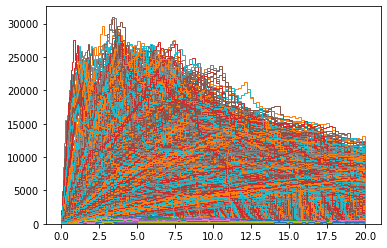

In [166]:
# do mean satellite thing (MINUS NOT DIVIDE)
searchradius = 20000
binwidth = [100,200]

for k in binwidth:

    differences = np.zeros(len(combined),dtype=int)

    for j in range(len(combined)):
        n_real,bin_real,patches = plt.hist(combined['DISTANCE'][j],bins=searchradius//k,
                                                              histtype='step',fill=False)

        n_rand,bin_rand,patches = plt.hist(combined['RAND_DISTANCE'][j],bins=searchradius//k,
                                                              histtype='step',fill=False)

        differences[j] = n_real[0] - (n_rand[0]/25)
        print(j,"/",len(combined))
    combined['MEAN_SATELLITES{}'.format(k)] = differences
    
    
    print(k,"binwidth done")
    
    
combined.info()

In [167]:
combined.write('/import/silo5/fscu5535/HSC_work/mod_data/allsamirealrand0.125_20Mpc_25xrand_5REmin.fits',overwrite=True)

In [168]:
combined.info()

<Table length=2153>
       name         dtype    shape       class       n_bad  
------------------ ------- ---------- ------------ ---------
             CATID   int64            MaskedColumn         0
       RE_CIRC_KPC float64                  Column         0
          DISTANCE float64   (51000,) MaskedColumn  31894203
                RA float64                  Column         0
               DEC float64                  Column         0
                 Z float64                  Column         0
     RAND_DISTANCE float64 (1275000,) MaskedColumn 814401197
             FIELD  bytes3                  Column         0
              xi50 float64     (400,)       Column         0
             xi100 float64     (200,)       Column         0
             xi200 float64     (100,)       Column         0
             xi500 float64      (40,)       Column         0
            xi1000 float64      (20,)       Column         0
   MEAN_SATELLITES   int64            MaskedColumn         0
    

In [165]:
combined.remove_column('MEAN_SATELLITES[100, 200]')

In [69]:
print(combined['FIELD'][675:677])
print(combined['FIELD'][1407:1409])
############################## 5:48pm

FIELD
-----
  G09
  G09
FIELD
-----
  G09
  G09


1429
1429
1429


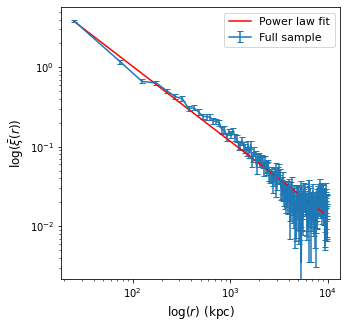

In [259]:
# SO DATA LINES UP

# now try plotting mean corr func of each field

maxradius = 10000
searchradius = 20000
binwidth = [50]
# fig = plt.figure(figsize=(8,6),dpi=100)
# ax = fig.add_subplot(1,1,1)

for k in binwidth:
    bins = (maxradius//k)

    radii = np.linspace(25,19975,searchradius//k,dtype=int)

#     counts = []
#     pointsG09 = np.array(combined[0:676]['xi{}'.format(k)])
#     pointsG09 = pointsG09[:,0:bins]
#     meanratios = np.nanmean(pointsG09,axis=0)

#     for j in range(pointsG09.shape[1]):
#         counts.append(np.count_nonzero(~np.isnan(pointsG09[:,j])))

#     plt.errorbar(radii[0:bins],meanratios[0:bins],yerr=np.nanstd(pointsG09,axis=0)/np.sqrt(counts),capsize=3,label="G09")

#     counts = []
#     pointsG12 = np.array(combined[676:1408]['xi{}'.format(k)])
#     pointsG12 = pointsG12[:,0:bins]
#     meanratios = np.nanmean(pointsG12,axis=0)

#     for j in range(pointsG12.shape[1]):
#         counts.append(np.count_nonzero(~np.isnan(pointsG12[:,j])))

#     plt.errorbar(radii[0:bins],meanratios[0:bins],yerr=np.nanstd(pointsG12,axis=0)/np.sqrt(counts),capsize=3,label="G12")

#     counts = []
#     pointsG15 = np.array(combined[1408:]['xi{}'.format(k)])
#     pointsG15 = pointsG15[:,0:bins]
#     meanratios = np.nanmean(pointsG15,axis=0)

#     for j in range(pointsG15.shape[1]):
#         counts.append(np.count_nonzero(~np.isnan(pointsG15[:,j])))

#     plt.errorbar(radii[0:bins],meanratios[0:bins],yerr=np.nanstd(pointsG15,axis=0)/np.sqrt(counts),capsize=3,label="G15")

    goodgalindices = []
    for i in range(len(combined)):
        if combined['SR_JVDS20'][i] == 1.0 or combined['FR_JVDS20'][i] == 1.0:
            goodgalindices.append(i)
    print(len(goodgalindices))
    
    
    counts = []
    pointsall = np.array(combined['xi{}'.format(k)][goodgalindices])
    print(len(pointsall))
    pointsall = pointsall[:,0:bins]
    print(len(pointsall))
    meanratios = np.nanmean(pointsall,axis=0)


    for j in range(pointsall.shape[1]):
        counts.append(np.count_nonzero(~np.isnan(pointsall[:,j])))

    fig, (ax) = plt.subplots(1, 1, figsize=(5,5))
    plt.errorbar(radii[0:bins],meanratios[0:bins],yerr=np.nanstd(pointsall,axis=0)/np.sqrt(counts),capsize=3,label='Full sample')   
    errors = np.nanstd(pointsall,axis=0)/np.sqrt(counts)
    
    # fit power law
    def func(x, x0, m):
        return (x/x0)**-m

    test = bins
    xdata, ydata = radii[0:test], meanratios[0:test]
    xdata2, ydata2 = radii[0:test], meanratios[0:test] + errors
    xdata3, ydata3 = radii[0:test], meanratios[0:test] - errors
    popt, pcov = curve_fit(func, xdata, ydata, maxfev=10000)
    plt.plot(xdata, func(xdata, *popt), 'r-',label='Power law fit')
    #popt2, pcov2 = curve_fit(func, xdata2, ydata2, maxfev=10000)
    #plt.plot(xdata2, func(xdata2, *popt2), 'r-', alpha = 0.5)
    #popt3, pcov3 = curve_fit(func, xdata3, ydata3, maxfev=10000)
    #plt.plot(xdata3, func(xdata3, *popt3), 'r-', alpha = 0.5)
    
    plt.xlabel("log($r$) (kpc)")
    plt.ylabel(r"log($\bar{\xi}(r)$)")
    #plt.title("Mean correlation function for SAMI".format(k))
    plt.legend()
    plt.minorticks_on()
    #plt.ylim(0.0,5)
    #plt.legend(loc="upper right")
    ax.set_yscale('log')
    ax.set_xscale('log')
    
#     filename = "/suphys/fscu5535/HSC_work/figures/sep+combmeancorrfuncloglogfixed.png"
#     plt.savefig(filename, bbox_inches='tight', pad_inches=0.3, dpi = 250)
    
#     plt.figure(figsize=(8,6),dpi=100)
#     plt.errorbar(radii[0:bins],meanratios[0:bins],yerr=np.nanstd(pointsall,axis=0)/np.sqrt(counts),capsize=3)

#     plt.xlabel("$r$ (kpc)")
#     plt.ylabel(r"$\xi(r)$")
#     plt.title("Mean correlation function for SAMI")
#     plt.minorticks_on()

    filename = "/suphys/fscu5535/HSC_work/figures/SAMImeancorrfuncfixed.png"
    plt.savefig(filename, bbox_inches='tight', pad_inches=0.3, dpi = 250)

In [219]:
print(np.min(np.nanstd(pointsall,axis=0)/np.sqrt(counts)))

0.005682155902099545


In [224]:
print(popt)
print(pcov)

[103.37166508   0.94255574]
[[ 0.77669569 -0.00390722]
 [-0.00390722  0.00003544]]


In [221]:
perr = np.sqrt(np.diag(pcov))
print(perr)

[0.8813034  0.00595321]


In [204]:
r0 = 1/((popt[2]**(-1/popt[1])/popt[0]))
r0max = 1/((popt2[2]**(-1/popt2[1])/popt2[0]))
r0min = 1/((popt3[2]**(-1/popt3[1])/popt3[0]))
print("r0:",r0)
print("r0max:",r0max-r0,r0max)
print("r0min:",r0-r0min,r0min)

print("gamma:",popt[1])
print("gammamax:",popt[1]-popt2[1],popt2[1])
print("gammamin:",popt3[1]-popt[1],popt3[1])

r0: 103.37164887218272
r0max: 7.336284307024826 110.70793317920754
r0min: 7.015076622551305 96.35657224963141
gamma: 0.9425557632844742
gammamax: 0.02310523965980882 0.9194505236246654
gammamin: 0.025920913071950324 0.9684766763564245


In [104]:
r0 = 1/((popt[2]**(-1/popt[1])/popt[0]))
r0max = 1/((popt2[2]**(-1/popt2[1])/popt2[0]))
r0min = 1/((popt3[2]**(-1/popt3[1])/popt3[0]))
print("r0:",r0)
print("r0max:",r0max-r0,r0max)
print("r0min:",r0-r0min,r0min)

print("gamma:",popt[1])
print("gammamax:",popt[1]-popt2[1],popt2[1])
print("gammamin:",popt3[1]-popt[1],popt3[1])

r0: 98.13085928537357
r0max: 5.697770390563008 103.82862967593658
r0min: 5.49315076619699 92.63770851917658
gamma: 0.9552762759712675
gammamax: 0.019607777321556386 0.9356684986497111
gammamin: 0.021594455844350602 0.9768707318156181


In [54]:
# next step is to left join SAMI data e.g. mass, spin, ellipticity, SR vs FR!
# then separate into SR and FR and calculate mean
# also bin by stellar mass first and then separate into SR/FR and calc mean
# also mass match and '' ' '' ' ' ' '
# can also do the above for r < 500kpc hists

# read in jesse data
sami = Table.read('/suphys/fscu5535/python_scripts/raw_data/jvds_stelkin_cat_v012_mge_seecorr_kh20_v20220604_private.fits')

In [70]:
sami.info()

<Table length=3430>
      name       dtype     class     n_bad
--------------- ------- ------------ -----
          CATID   int64       Column     0
      CATID_EXT   int64       Column     0
  SAMI_FILENAME bytes69       Column     0
       OBS_DATE bytes21       Column     0
             RA float32       Column     0
            DEC float32       Column     0
         LMSTAR float32       Column     0
         Z_SPEC float32       Column     0
        Z_TONRY float32 MaskedColumn   984
        GMINUSI float32       Column     0
       MU_AT_RE float32 MaskedColumn   984
       GAL_FLAG float32       Column     0
       HWHM_PSF float32       Column     0
             RE float32 MaskedColumn    53
    RE_CIRC_KPC float32 MaskedColumn    53
          ELLIP float32 MaskedColumn    52
       N_SERSIC float32 MaskedColumn   108
          MTYPE float32       Column     0
      KIN_MTYPE float32       Column     0
ENV_DIST_TO_5NN float32 MaskedColumn   130
   ENV_SURFDENS float32 MaskedColu

In [55]:
sami.sort('LAMBDAR_RE')
samigroups = sami.group_by('CATID')

    

In [56]:
print(len(samigroups.groups))
print(len(sami))

3071
3430


In [57]:
for i in range(150):
        if len(samigroups.groups[i]) > 1:
            print(i)



37
39
59
60
61
62
64
65
103
104
105
108
123
135
138
141
143
144


In [58]:
print(samigroups.groups[37]['CATID'])


CATID
-----
15165
15165


In [59]:
CATIDs = []
LAMBDAR_REs = []
ELLIPs = []
LMSTARs = []
SR_JVDS20s = []
FR_JVDS20s = []

for i in range(len(samigroups.groups)):
    CATIDs.append(samigroups.groups[i]['CATID'][0])
    LAMBDAR_REs.append(samigroups.groups[i]['LAMBDAR_RE'][0])
    ELLIPs.append(samigroups.groups[i]['ELLIP'][0])
    SR_JVDS20s.append(samigroups.groups[i]['SR_JVDS20'][0])
    FR_JVDS20s.append(samigroups.groups[i]['FR_JVDS20'][0])
    LMSTARs.append(samigroups.groups[i]['LMSTAR'][0])
    
print(len(CATIDs))

3071


In [60]:
samirel = Table()
samirel['CATID'] = CATIDs
samirel['LAMBDAR_RE'] = LAMBDAR_REs
samirel['ELLIP'] = ELLIPs
samirel['LMSTAR'] = LMSTARs
samirel['SR_JVDS20'] = SR_JVDS20s
samirel['FR_JVDS20'] = FR_JVDS20s

In [61]:
print(samirel['CATID'][37])

15165


In [62]:
samirel.write('/import/silo5/fscu5535/HSC_work/mod_data/samireldata.fits',overwrite=True)

In [63]:
combined.info()

<Table length=2153>
      name       dtype    shape       class       n_bad  
--------------- ------- ---------- ------------ ---------
          CATID   int64                  Column         0
    RE_CIRC_KPC float64                  Column         0
       DISTANCE float64   (51000,) MaskedColumn  31894203
             RA float64                  Column         0
            DEC float64                  Column         0
              Z float64                  Column         0
  RAND_DISTANCE float64 (1275000,) MaskedColumn 814401197
          FIELD    str3                  Column         0
           xi50 float64     (400,)       Column         0
          xi100 float64     (200,)       Column         0
          xi200 float64     (100,)       Column         0
          xi500 float64      (40,)       Column         0
         xi1000 float64      (20,)       Column         0
MEAN_SATELLITES   int64                  Column         0


In [64]:
samirel= Table.read('/import/silo5/fscu5535/HSC_work/mod_data/samireldata.fits')

combined = join(combined,samirel,keys='CATID',join_type='left')
combined.info()

<Table length=2153>
      name       dtype    shape       class       n_bad  
--------------- ------- ---------- ------------ ---------
          CATID   int64            MaskedColumn         0
    RE_CIRC_KPC float64                  Column         0
       DISTANCE float64   (51000,) MaskedColumn  31894203
             RA float64                  Column         0
            DEC float64                  Column         0
              Z float64                  Column         0
  RAND_DISTANCE float64 (1275000,) MaskedColumn 814401197
          FIELD    str3                  Column         0
           xi50 float64     (400,)       Column         0
          xi100 float64     (200,)       Column         0
          xi200 float64     (100,)       Column         0
          xi500 float64      (40,)       Column         0
         xi1000 float64      (20,)       Column         0
MEAN_SATELLITES   int64                  Column         0
     LAMBDAR_RE float64            MaskedColumn     

In [89]:
# testindex = 1000

# for j in range(len(samirel)):
#     if samirel['CATID'][j] == combined['CATID'][testindex]:
#         print(j)
#         print(combined['FIELD'][testindex])
#         print(combined['RA'][testindex])
#         print("combined spin:",combined['LAMBDAR_RE'][testindex])
#         print("sami spin:",samirel['LAMBDAR_RE'][j])
 
g09index = []
g12index = []
g15index = []
    
for i in range(len(combined)):
    if combined['FIELD'][i] == "G09":
        g09index.append(i)
    if combined['FIELD'][i] == "G12":
        g12index.append(i)
    if combined['FIELD'][i] == "G15":
        g15index.append(i)
    
print(g09index[0:10])
print(g12index[30:40])
print(g15index[0:10])

[654, 655, 656, 657, 658, 659, 660, 661, 662, 663]
[30, 31, 66, 67, 68, 69, 70, 71, 72, 73]
[32, 33, 34, 35, 36, 37, 38, 39, 40, 41]


In [66]:
samiid = combined['CATID'][10]

for i in range(len(sami)):
    if sami['CATID'][i] == samiid:
        print(sami['ELLIP'][i])
        print(sami['LAMBDAR_RE'][i])
        print(combined['ELLIP'][10])
        print(combined['LAMBDAR_RE'][10])
        

0.26878008
0.13878947
0.26878008246421814
0.13878947496414185


In [67]:
combined.write('/import/silo5/fscu5535/HSC_work/mod_data/allsamirealrand0.125_20Mpc.fits',overwrite=True)

In [3]:
combined = Table.read('/import/silo5/fscu5535/HSC_work/mod_data/allsamirealrand0.125_20Mpc.fits')
combined.info()

<Table length=2153>
      name       dtype    shape       class       n_bad  
--------------- ------- ---------- ------------ ---------
          CATID   int64            MaskedColumn         0
    RE_CIRC_KPC float64                  Column         0
       DISTANCE float64   (51000,) MaskedColumn  31894203
             RA float64                  Column         0
            DEC float64                  Column         0
              Z float64                  Column         0
  RAND_DISTANCE float64 (1275000,) MaskedColumn 814401197
          FIELD  bytes3                  Column         0
           xi50 float64     (400,)       Column         0
          xi100 float64     (200,)       Column         0
          xi200 float64     (100,)       Column         0
          xi500 float64      (40,)       Column         0
         xi1000 float64      (20,)       Column         0
MEAN_SATELLITES   int64            MaskedColumn         0
     LAMBDAR_RE float64            MaskedColumn     

In [200]:
print(np.nansum(combined['FR_JVDS20']))

1316.0


(113, 400)
(1316, 400)
(113, 200)
(1316, 200)


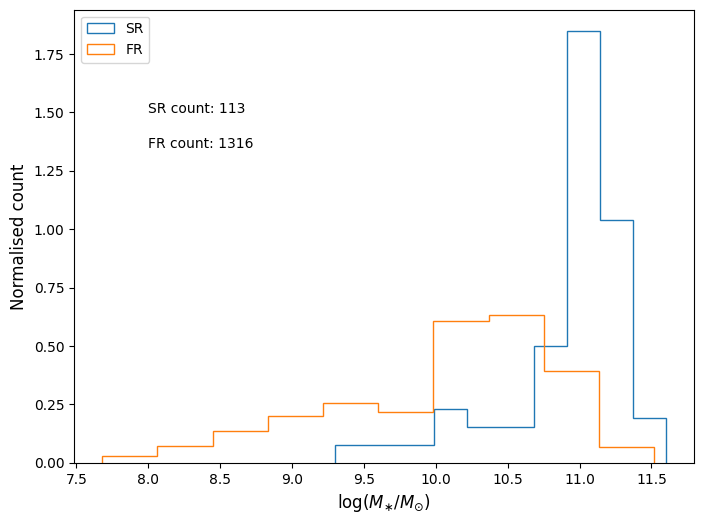

In [233]:
# split population into SR and FR

SRxis = np.zeros(400)
SRxis100 = np.zeros(200)
SRmass = []
FRxis = np.zeros(400)
FRxis100 = np.zeros(200)
FRmass = []

for i in range(len(combined)):
    if combined['SR_JVDS20'][i] == 1.0:
        SRxis = np.vstack((SRxis,combined['xi50'][i]))
        SRxis100 = np.vstack((SRxis100,combined['xi100'][i]))
        SRmass.append(combined['LMSTAR'][i])
    if combined['FR_JVDS20'][i] == 1.0:
        FRxis = np.vstack((FRxis,combined['xi50'][i]))
        FRxis100 = np.vstack((FRxis100,combined['xi100'][i]))
        FRmass.append(combined['LMSTAR'][i])
        
SRxis = np.delete(SRxis,0,0)
FRxis = np.delete(FRxis,0,0)

SRxis100 = np.delete(SRxis100,0,0)
FRxis100 = np.delete(FRxis100,0,0)



SRmass = np.asarray(SRmass)
FRmass = np.asarray(FRmass)

print(SRxis.shape)
print(FRxis.shape)

print(SRxis100.shape)
print(FRxis100.shape)

plt.figure(figsize=(8,6),dpi=100)
plt.hist(SRmass,fill=False,histtype='step',label='SR',density=True)
plt.hist(FRmass,fill=False,histtype='step',label='FR',density=True)
plt.legend()
plt.xlabel(r"log($M_{\ast}/M_{\odot})$")
plt.ylabel("Normalised count")
plt.annotate("SR count: {}".format(len(SRmass)),(8,1.5))
plt.annotate("FR count: {}".format(len(FRmass)),(8,1.35))
filename = "/suphys/fscu5535/HSC_work/figures/SRFRmassdist.png".format(i)
plt.savefig(filename, bbox_inches='tight', pad_inches=0.3, dpi = 250)


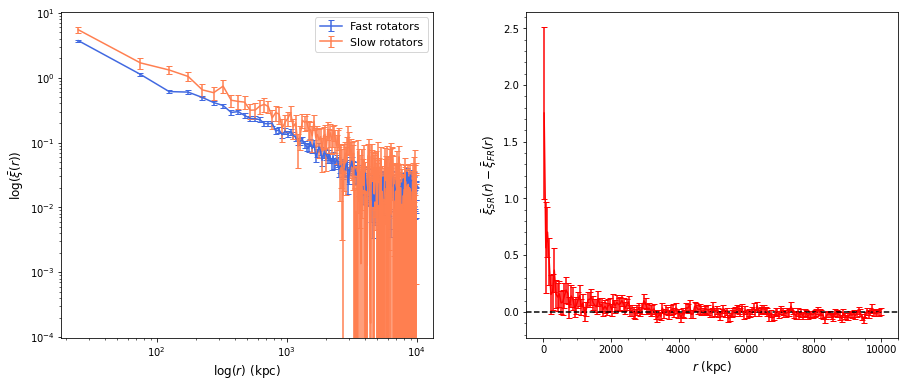

In [251]:
# FR SR no mass matching

searchradius = 20000
binwidth = [50]

for k in binwidth:

    radii = np.linspace(25,19975,searchradius//k,dtype=int)
    maxradius = 10000
    bins = (maxradius//k)
    
    # FR
    countsFR = []
    pointsFR = FRxis
    pointsFR = pointsFR[:,0:bins]
    meanratiosFR = np.nanmean(pointsFR,axis=0)

    for j in range(pointsFR.shape[1]):
        countsFR.append(np.count_nonzero(~np.isnan(pointsFR[:,j])))
    
    # SR
    countsSR = []
    pointsSR = SRxis
    pointsSR = pointsSR[:,0:bins]
    meanratiosSR = np.nanmean(pointsSR,axis=0)

    for j in range(pointsSR.shape[1]):
        countsSR.append(np.count_nonzero(~np.isnan(pointsSR[:,j])))
    
    # loglog
    fig, (ax1, ax2) = plt.subplots(1, 2, gridspec_kw={'wspace' : 0.25}, figsize=(15,6))
    ax1.errorbar(radii[0:bins],meanratiosFR[0:bins],yerr=np.nanstd(pointsFR,axis=0)/np.sqrt(countsFR),capsize=3,label='Fast rotators',c='royalblue')
    ax1.errorbar(radii[0:bins],meanratiosSR[0:bins],yerr=np.nanstd(pointsSR,axis=0)/np.sqrt(countsSR),capsize=3,label='Slow rotators',c='coral')   
    ax1.set_xlabel("log($r$) (kpc)")
    ax1.set_ylabel(r"log($\bar{\xi}(r)$)")
    #ax1.title("Mean correlation function")
    ax1.legend()
    ax1.minorticks_on()
    ax1.set_yscale('log')
    ax1.set_xscale('log')
    
    #filename = "/suphys/fscu5535/HSC_work/figures/SRFRmeancorrfuncloglogfixed.png"
    #plt.savefig(filename, bbox_inches='tight', pad_inches=0.3, dpi = 250)
    
    # normal
#     fig = plt.figure(figsize=(8,6),dpi=100)
#     ax = fig.add_subplot(1,1,1)
#     plt.errorbar(radii[0:bins],meanratiosFR[0:bins],yerr=np.nanstd(pointsFR,axis=0)/np.sqrt(countsFR),capsize=3,label='Fast rotators')
#     plt.errorbar(radii[0:bins],meanratiosSR[0:bins],yerr=np.nanstd(pointsSR,axis=0)/np.sqrt(countsSR),capsize=3,label='Slow rotators')
#     plt.xlabel("$r$ (kpc)")
#     plt.ylabel(r"$\xi(r)$")
#     plt.title("Mean correlation function")
#     plt.legend()
#     plt.minorticks_on()
    
    #filename = "/suphys/fscu5535/HSC_work/figures/SRFRmeancorrfuncfixed.png"
    #plt.savefig(filename, bbox_inches='tight', pad_inches=0.3, dpi = 250)
    
    # residuals 10Mpc
#     fig = plt.figure(figsize=(8,6),dpi=100)
#     ax = fig.add_subplot(1,1,1)
    ax2.errorbar(radii[0:bins],meanratiosSR[0:bins]-meanratiosFR[0:bins],yerr=(np.nanstd(pointsSR,axis=0)/np.sqrt(countsSR)+np.nanstd(pointsFR,axis=0)/np.sqrt(countsFR)),capsize=3,c='r')
    ax2.plot((-500,10500),(0,0),'k--')
    ax2.set_xlim(-500,10500)
    ax2.set_xlabel("$r$ (kpc)")
    ax2.set_ylabel(r"$\bar{\xi}_{SR}(r) - \bar{\xi}_{FR}(r) $")
    ax2.minorticks_on()
    
    filename = "/suphys/fscu5535/HSC_work/figures/SRFRmeancorrfuncloglogNOTMASSMATCHED.png"
    plt.savefig(filename, bbox_inches='tight', pad_inches=0.3, dpi = 250)
    
    # residuals 1Mpc
    
#     filename = "/suphys/fscu5535/HSC_work/figures/SRFRmeancorrfuncresidualsfixed1mpc.png"
#     plt.savefig(filename, bbox_inches='tight', pad_inches=0.3, dpi = 250)  
    

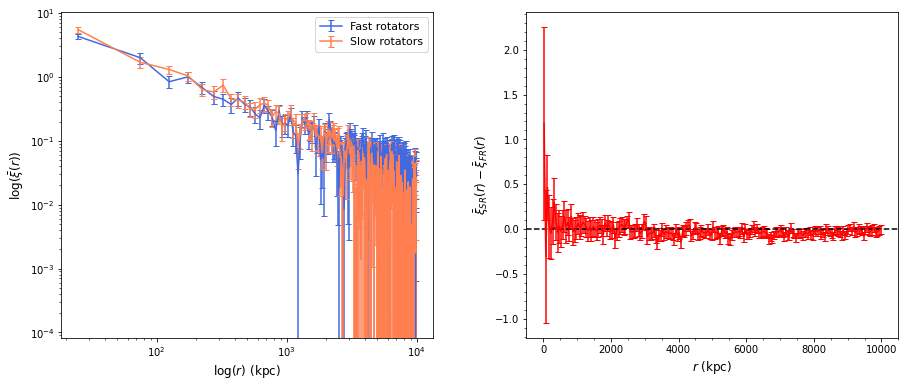

In [252]:
# now try mass matching
# shuffle data
np.set_printoptions(suppress=True)

SRxiscopy = SRxis
SRmasscopy = SRmass
FRxiscopy = FRxis
FRmasscopy = FRmass

# print(SRxis.shape[0])
# print(FRxis.shape[0])

# # with replacement for SR indices for bootstrapping
# SRindices = np.random.randint()




# mass matching
searchradius = 20000
binwidth = [50]

for k in binwidth:

    matchedSR = np.zeros((len(SRxis),searchradius//k))
    matchedFR = np.zeros((len(SRxis),searchradius//k))
    matchedFRindices = np.full(len(SRxis),9999,dtype='int')
    maxdiff = 0.15
    row = 0

    for l in range(len(SRxis)):
        for m in range(len(FRxis)):
            if (abs(SRmass[l] - FRmass[m]) <= maxdiff and m not in matchedFRindices):
                matchedSR[row,:] = SRxis[l,:]
                matchedFR[row,:] = FRxis[m,:]
                matchedFRindices[row] = m
                row += 1
                break

            
    radii = np.linspace(25,19975,searchradius//k,dtype=int)
    maxradius = 10000
    bins = (maxradius//k)
    
    # FR
    countsFR = []
    pointsFR = matchedFR
    pointsFR = pointsFR[:,0:bins]
    meanratiosFR = np.nanmean(pointsFR,axis=0)

    for j in range(pointsFR.shape[1]):
        countsFR.append(np.count_nonzero(~np.isnan(pointsFR[:,j])))
    
    # SR
    countsSR = []
    pointsSR = matchedSR
    pointsSR = pointsSR[:,0:bins]
    meanratiosSR = np.nanmean(pointsSR,axis=0)

    for j in range(pointsSR.shape[1]):
        countsSR.append(np.count_nonzero(~np.isnan(pointsSR[:,j])))
    
    # loglog
    fig, (ax1, ax2) = plt.subplots(1, 2, gridspec_kw={'wspace' : 0.25}, figsize=(15,6))
    ax1.errorbar(radii[0:bins],meanratiosFR[0:bins],yerr=np.nanstd(pointsFR,axis=0)/np.sqrt(countsFR),capsize=3,label='Fast rotators',c='royalblue')
    ax1.errorbar(radii[0:bins],meanratiosSR[0:bins],yerr=np.nanstd(pointsSR,axis=0)/np.sqrt(countsSR),capsize=3,label='Slow rotators',c='coral')   
    ax1.set_xlabel("log($r$) (kpc)")
    ax1.set_ylabel(r"log($\bar{\xi}(r)$)")
    #plt.title("Mean correlation function (mass matched within 0.15 dex)")
    ax1.legend()
    plt.minorticks_on()
    ax1.set_yscale('log')
    ax1.set_xscale('log')
    
#     filename = "/suphys/fscu5535/HSC_work/figures/SRFRmeancorrfuncloglogmassmatchedfixed.png"
#     plt.savefig(filename, bbox_inches='tight', pad_inches=0.3, dpi = 250)
    
#     # normal
#     fig = plt.figure(figsize=(8,6),dpi=100)
#     ax = fig.add_subplot(1,1,1)
#     plt.errorbar(radii[0:bins],meanratiosFR[0:bins],yerr=np.nanstd(pointsFR,axis=0)/np.sqrt(countsFR),capsize=3,label='Fast rotators',c='royalblue')
#     plt.errorbar(radii[0:bins],meanratiosSR[0:bins],yerr=np.nanstd(pointsSR,axis=0)/np.sqrt(countsSR),capsize=3,label='Slow rotators',c='coral')
#     plt.xlabel("$r$ (kpc)")
#     plt.ylabel(r"$\xi(r)$")
#     plt.title("Mean correlation function (mass matched within 0.15 dex)")
#     plt.legend()
#     plt.minorticks_on()
    
#     filename = "/suphys/fscu5535/HSC_work/figures/SRFRmeancorrfuncmassmatchedfixed.png"
#     plt.savefig(filename, bbox_inches='tight', pad_inches=0.3, dpi = 250)
    
    # residuals 10Mpc
    #fig, (ax) = plt.subplots(1, 1, figsize=(5,5))
    ax2.errorbar(radii[0:bins],meanratiosSR[0:bins]-meanratiosFR[0:bins],yerr=(np.nanstd(pointsSR,axis=0)/np.sqrt(countsSR)+np.nanstd(pointsFR,axis=0)/np.sqrt(countsFR)),capsize=3,c='r')
    ax2.plot((-500,10500),(0,0),'k--')
    ax2.set_xlim(-500,10500)
    ax2.set_xlabel("$r$ (kpc)")
    ax2.set_ylabel(r"$\bar{\xi}_{SR}(r) - \bar{\xi}_{FR}(r) $")
    plt.minorticks_on()
    
    filename = "/suphys/fscu5535/HSC_work/figures/SRFRmeancorrfuncloglogmassmatchedfixed.png"
    plt.savefig(filename, bbox_inches='tight', pad_inches=0.3, dpi = 250)
    
    
#     filename = "/suphys/fscu5535/HSC_work/figures/SRFRmeancorrfuncmassmatchedresidualsfixed.png"
#     plt.savefig(filename, bbox_inches='tight', pad_inches=0.3, dpi = 250)   
    
    
    

In [153]:
print(SRmass)
print(FRmass[matchedFRindices])

[11.12 11.02 10.95 10.59 11.08 10.41 11.06 11.08 11.31 11.28 11.29 11.32
 11.06 11.16 10.93 11.07 10.92 10.05 11.21 11.1  10.08 10.98 11.   11.14
 11.06  9.62 10.94 10.93 11.2  11.02 10.8  11.24 10.33 10.17 11.09 11.08
 11.26 11.03 11.38 10.96 10.88 10.9  10.9  10.43 11.11 10.9  10.96 10.99
 11.05  9.94 11.6  11.28 10.93 10.97 11.17 11.15 11.24 11.23 11.26 11.01
 11.    9.3  10.9  10.92 10.81 10.32 10.95 11.04 10.79  9.7  11.2  11.04
 11.29 11.16 11.43 10.65 10.82 11.2  10.92 10.74 10.96 11.22 10.8  11.19
 11.04 11.39 11.07 11.26 11.24 10.94 11.13 11.1  11.08 10.93 11.42 10.81
 10.95 10.59  9.32 10.78 11.2  11.03 11.07 11.21 11.15 10.96 10.64 10.17
 11.07 10.2  11.1   9.95 10.  ]
[11.05 10.96 10.92 10.53 11.15 10.48 11.06 11.12 11.33 11.28 11.3  11.31
 11.14 11.16 10.87 11.   10.91 10.   11.13 11.01  9.99 10.94 10.92 11.1
 10.98  9.66 10.95 10.96 11.1  11.03 10.8  11.2  10.36 10.23 11.01 11.05
 11.35 10.99 11.44 10.91 10.81 10.8  10.89 10.45 11.06 10.83 11.   10.89
 11.   10.01 11.52 1

In [137]:
# now try r < 500 thing + mean sats
# split population into SR and FR

SRxis500 = []
SRmeansats = []
SRmass500 = []
FRxis500 = []
FRmeansats = []
FRmass500 = []

for i in range(len(combined)):
    if combined['SR_JVDS20'][i] == 1.0:
        SRxis500.append(combined['xi500'][i][0])
        SRmass500.append(combined['LMSTAR'][i])
        SRmeansats.append(combined['MEAN_SATELLITES'][i])
    if combined['FR_JVDS20'][i] == 1.0:
        FRxis500.append(combined['xi500'][i][0])
        FRmass500.append(combined['LMSTAR'][i])
        FRmeansats.append(combined['MEAN_SATELLITES'][i])
        

SRmass500 = np.asarray(SRmass500)
FRmass500 = np.asarray(FRmass500)
SRxis500 = np.asarray(SRxis500)
FRxis500 = np.asarray(FRxis500)
SRmeansats = np.asarray(SRmeansats)
FRmeansats = np.asarray(FRmeansats)


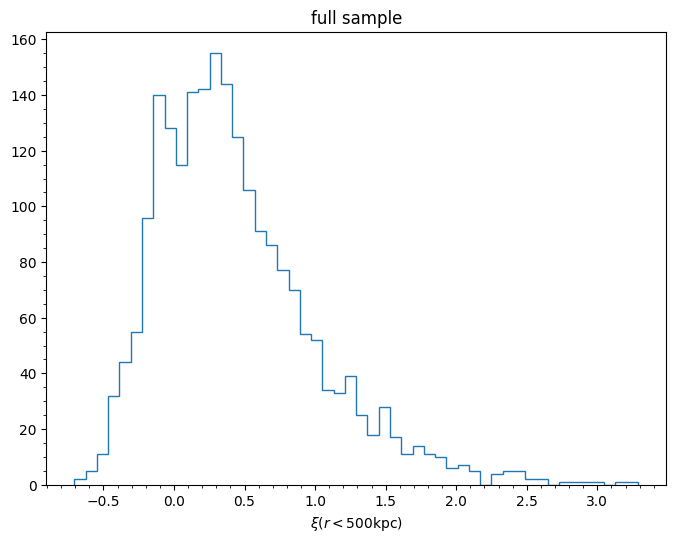

In [46]:
# make hists
data = combined['xi500']
data = data[:,0]
plt.figure(figsize=(8,6),dpi=100)
plt.hist(data,fill=False,histtype='step',bins = 50)
plt.title("full sample")
plt.xlabel(r'$\xi(r < 500$kpc)')
plt.minorticks_on()

filename = "/suphys/fscu5535/HSC_work/figures/rlt500corrfuncfixed.png"
plt.savefig(filename, bbox_inches='tight', pad_inches=0.3, dpi = 250) 


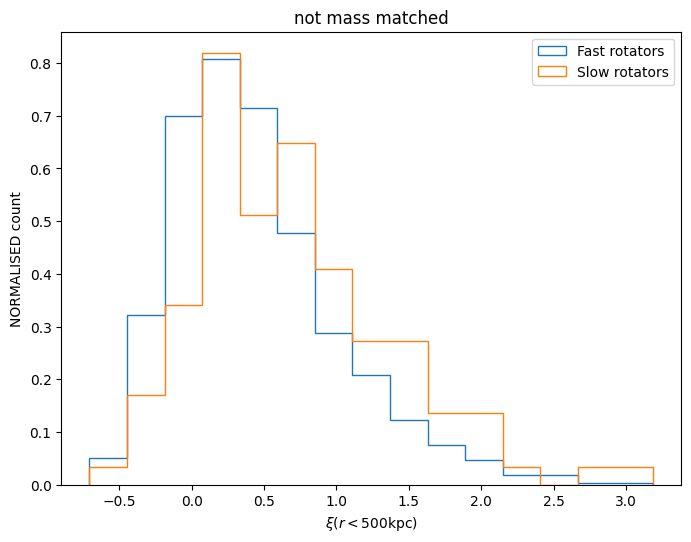

In [47]:
plt.figure(figsize=(8,6),dpi=100)
bins=np.histogram(np.hstack((SRxis500,FRxis500)), bins=15)[1]
plt.hist(FRxis500,label='Fast rotators',fill=False,histtype='step',density=True,bins=bins)
plt.hist(SRxis500,label='Slow rotators',fill=False,histtype='step',density=True,bins=bins)
plt.xlabel(r'$\xi(r < 500$kpc)')
plt.ylabel('N (normalised)')
#plt.title("not mass matched")
plt.legend()

filename = "/suphys/fscu5535/HSC_work/figures/SRFRrlt500corrfuncfixed.png"
plt.savefig(filename, bbox_inches='tight', pad_inches=0.3, dpi = 250) 

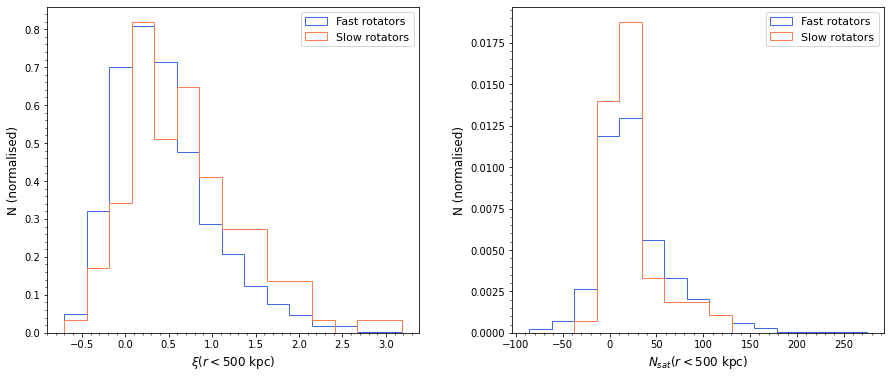

In [257]:
fig, (ax1, ax2) = plt.subplots(1, 2, gridspec_kw={'wspace' : 0.25}, figsize=(15,6))
bins=np.histogram(np.hstack((SRxis500,FRxis500)), bins=15)[1]
ax1.hist(FRxis500,label='Fast rotators',fill=False,histtype='step',bins=bins,color='royalblue',density=True)
ax1.hist(SRxis500,label='Slow rotators',fill=False,histtype='step',bins=bins,color='coral',density=True)
ax1.set_xlabel(r'$\xi(r < 500$ kpc)')
ax1.set_ylabel('N (normalised)')
ax1.minorticks_on()
ax1.legend()

# filename = "/suphys/fscu5535/HSC_work/figures/SRFRrlt500corrfuncmassmatchedfixed.png"
# plt.savefig(filename, bbox_inches='tight', pad_inches=0.3, dpi = 250) 

# make hists # MEAN SATELLITES
bins=np.histogram(np.hstack((SRmeansats,FRmeansats)), bins=15)[1]
ax2.hist(FRmeansats,label='Fast rotators',fill=False,histtype='step',bins=bins,color='royalblue',density=True)
ax2.hist(SRmeansats,label='Slow rotators',fill=False,histtype='step',bins=bins,color='coral',density=True)
ax2.set_xlabel(r'$N_{sat} (r < 500$ kpc)')
ax2.minorticks_on()
ax2.set_ylabel('N (normalised)')
ax2.legend()

filename = "/suphys/fscu5535/HSC_work/figures/SRFRlt500+satsNOTMASSMATCHED.png"
plt.savefig(filename, bbox_inches='tight', pad_inches=0.3, dpi = 250) 

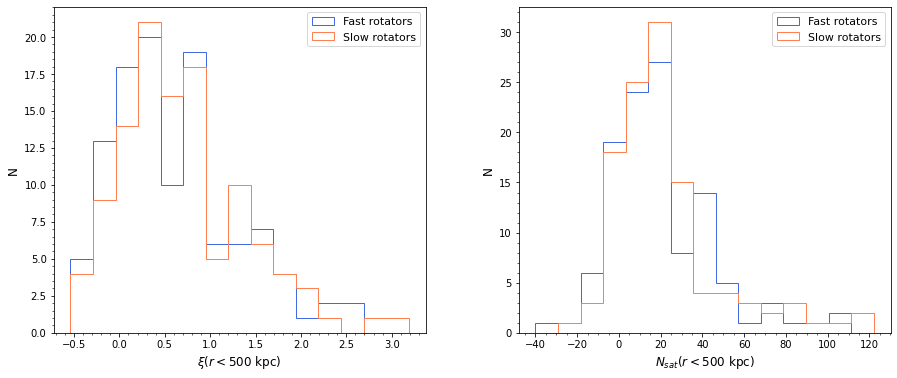

In [253]:
# mass matching
searchradius = 20000
binwidth = [500]

for k in binwidth:

    matchedSR500 = np.zeros(len(SRxis500))
    matchedFR500 = np.zeros(len(SRxis500))
    matchedSRmeansats = np.zeros(len(SRmeansats),dtype=int)
    matchedFRmeansats = np.zeros(len(SRmeansats),dtype=int)
    matchedFR500indices = np.full(len(SRxis),9999,dtype=int)
    maxdiff = 0.15
    index = 0

    for l in range(len(SRxis500)):
        for m in range(len(FRxis500)):
            if (abs(SRmass500[l] - FRmass500[m]) <= maxdiff and m not in matchedFR500indices):
                matchedSR500[index] = SRxis500[l]
                matchedFR500[index] = FRxis500[m]
                matchedSRmeansats[index] = SRmeansats[l]
                matchedFRmeansats[index] = FRmeansats[m]
                matchedFR500indices[index] = m
                index += 1
                break

fig, (ax1, ax2) = plt.subplots(1, 2, gridspec_kw={'wspace' : 0.25}, figsize=(15,6))
bins=np.histogram(np.hstack((matchedSR500,matchedFR500)), bins=15)[1]
ax1.hist(matchedFR500,label='Fast rotators',fill=False,histtype='step',bins=bins,color='royalblue')
ax1.hist(matchedSR500,label='Slow rotators',fill=False,histtype='step',bins=bins,color='coral')
ax1.set_xlabel(r'$\xi(r < 500$ kpc)')
ax1.set_ylabel('N')
ax1.minorticks_on()
ax1.legend()

# filename = "/suphys/fscu5535/HSC_work/figures/SRFRrlt500corrfuncmassmatchedfixed.png"
# plt.savefig(filename, bbox_inches='tight', pad_inches=0.3, dpi = 250) 

# make hists # MEAN SATELLITES
bins=np.histogram(np.hstack((matchedSRmeansats,matchedFRmeansats)), bins=15)[1]
ax2.hist(matchedFRmeansats,label='Fast rotators',fill=False,histtype='step',bins=bins,color='royalblue')
ax2.hist(matchedSRmeansats,label='Slow rotators',fill=False,histtype='step',bins=bins,color='coral')
ax2.set_xlabel(r'$N_{sat} (r < 500$ kpc)')
ax2.minorticks_on()
ax2.set_ylabel('N')
ax2.legend()

filename = "/suphys/fscu5535/HSC_work/figures/SRFRlt500+satsmassmatched.png"
plt.savefig(filename, bbox_inches='tight', pad_inches=0.3, dpi = 250) 

In [245]:
print("meanSRsats",np.mean(matchedSRmeansats))
print("meanFRsats",np.mean(matchedFRmeansats))
#print("medianSRsats",np.median(matchedSRmeansats))
#print("medianFRsats",np.median(matchedFRmeansats))
print("stdevSRsats",np.std(matchedSRmeansats))
print("stdevFRsats",np.std(matchedFRmeansats))
print()
print("meanSR500",np.mean(matchedSR500))
print("meanFR500",np.mean(matchedFR500))
#print("medianSR500",np.median(matchedSR500))
#print("medianFR500",np.median(matchedFR500))
print("stdevSR500",np.std(matchedSR500))
print("stdevFR500",np.std(matchedFR500))









meanSRsats 22.654867256637168
meanFRsats 19.716814159292035
stdevSRsats 27.001727218272347
stdevFRsats 25.27038527904361

meanSR500 0.7009640818807406
meanFR500 0.623391123740356
stdevSR500 0.6910004992945326
stdevFR500 0.67686688928759


# make hists # MEAN SATELLITES
data = combined['MEAN_SATELLITES']
plt.figure(figsize=(8,6),dpi=100)
plt.hist(data,fill=False,histtype='step',bins = 50)
plt.title("Mean satellites (full sample)")
plt.xlabel(r'n')
plt.minorticks_on()

filename = "/suphys/fscu5535/HSC_work/figures/meansatellitesfixed.png"
plt.savefig(filename, bbox_inches='tight', pad_inches=0.3, dpi = 250) 

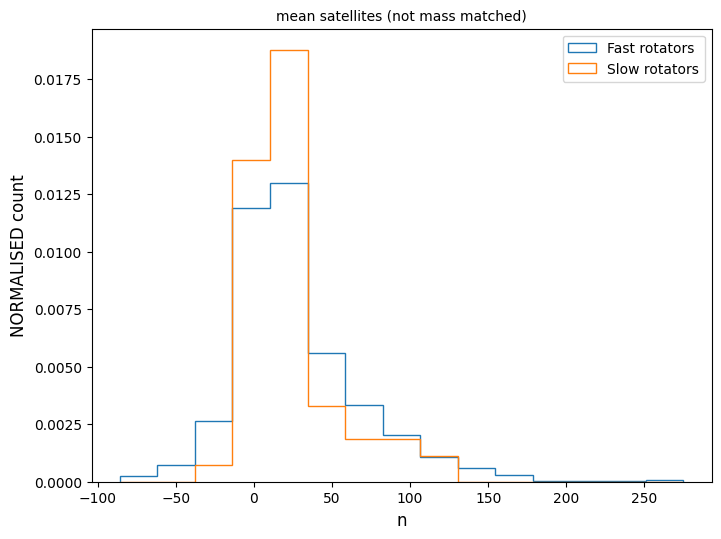

In [246]:
# make hists # MEAN SATELLITES
plt.figure(figsize=(8,6),dpi=100)
bins=np.histogram(np.hstack((SRmeansats,FRmeansats)), bins=15)[1]
plt.hist(FRmeansats,label='Fast rotators',fill=False,histtype='step',density=True,bins=bins)
plt.hist(SRmeansats,label='Slow rotators',fill=False,histtype='step',density=True,bins=bins)
plt.xlabel(r'n')
plt.ylabel('NORMALISED count')
plt.title("mean satellites (not mass matched)")
plt.legend()

filename = "/suphys/fscu5535/HSC_work/figures/SRFRmeansatsfixed.png"
plt.savefig(filename, bbox_inches='tight', pad_inches=0.3, dpi = 250) 

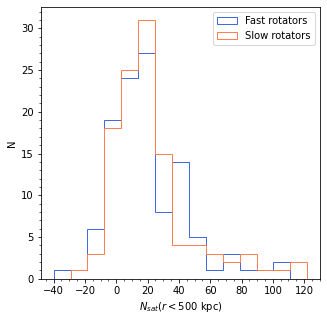

In [150]:
# make hists # MEAN SATELLITES
fig, (ax) = plt.subplots(1, 1, figsize=(5,5))
bins=np.histogram(np.hstack((matchedSRmeansats,matchedFRmeansats)), bins=15)[1]
plt.hist(matchedFRmeansats,label='Fast rotators',fill=False,histtype='step',bins=bins,color='royalblue')
plt.hist(matchedSRmeansats,label='Slow rotators',fill=False,histtype='step',bins=bins,color='coral')
plt.xlabel(r'$N_{sat} (r < 500$ kpc)')
plt.minorticks_on()
plt.ylabel('N')
plt.legend()

filename = "/suphys/fscu5535/HSC_work/figures/SRFRmeansatsmassmatchedfixed.png"
plt.savefig(filename, bbox_inches='tight', pad_inches=0.3, dpi = 250) 

In [23]:
# ks tests
#LW AGE
mean_sats = stats.kstest(matchedFRmeansats,matchedSRmeansats)
print("mean satellites ks test:",mean_sats)

xi500 = stats.kstest(matchedFR500,matchedSR500)
print("xi(r<500kpc) ks test:",xi500)



mean satellites ks test: KstestResult(statistic=0.07964601769911504, pvalue=0.8682314447581876)
xi(r<500kpc) ks test: KstestResult(statistic=0.10619469026548672, pvalue=0.5490386434693659)


In [54]:
g09xi = np.full(400,np.nan)
g12xi = np.full(400,np.nan)
g15xi = np.full(400,np.nan)

for i in range(len(combined)):
    
    if combined['FIELD'][i] == 'G09':
        g09xi = np.vstack((g09xi,combined['xi50'][i]))
        
    if combined['FIELD'][i] == 'G12':
        g09xi = np.vstack((g12xi,combined['xi50'][i]))
        
    if combined['FIELD'][i] == 'G15':
        g09xi = np.vstack((g15xi,combined['xi50'][i]))
        
g09xi = np.delete(g09xi,0,0)
g12xi = np.delete(g12xi,0,0)
g15xi = np.delete(g15xi,0,0)

print(g09xi.shape)
print(g12xi.shape)
print(g15xi.shape)


        


(399,)
(399,)
(399,)


In [62]:
for i in range(len(combined)):
    if combined['FIELD'][i] != 'G09':
        print(i)
        break
        


0


In [49]:
combined.info()

<Table length=2153>
      name       dtype    shape       class       n_bad  
--------------- ------- ---------- ------------ ---------
          CATID   int64                  Column         0
    RE_CIRC_KPC float64                  Column         0
       DISTANCE float64   (51000,) MaskedColumn  31894203
             RA float64                  Column         0
            DEC float64                  Column         0
              Z float64                  Column         0
  RAND_DISTANCE float64 (1275000,) MaskedColumn 814401197
          FIELD    str3                  Column         0
           xi50 float64     (400,)       Column         0
          xi100 float64     (200,)       Column         0
          xi200 float64     (100,)       Column         0
          xi500 float64      (40,)       Column         0
         xi1000 float64      (20,)       Column         0
MEAN_SATELLITES   int64                  Column         0


Text(0, 0.5, 'log$(M_{\\ast}/M_{\\odot})$')

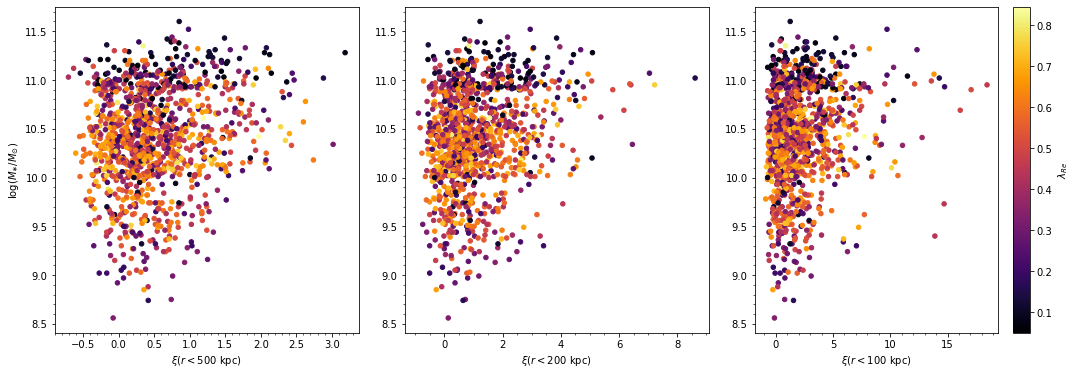

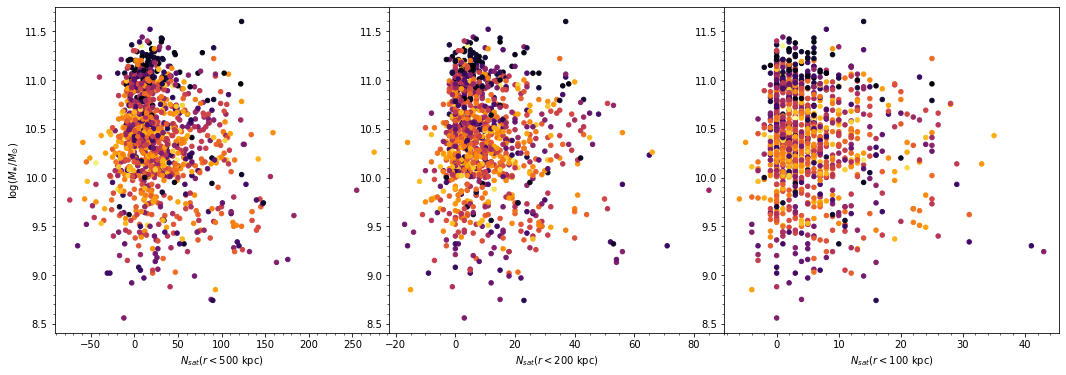

In [186]:
xi500plot = []
xi200plot = []
xi100plot = []
spinsplot = []
meansatsplot = []
meansats200plot = []
meansats100plot = []
massplot = []

for i in range(len(combined)):
    if not(combined['LAMBDAR_RE'].mask[i]):
        spinsplot.append(combined['LAMBDAR_RE'][i])
        xi500plot.append(combined['xi500'][i][0])
        xi200plot.append(combined['xi200'][i][0])
        xi100plot.append(combined['xi100'][i][0])
        meansatsplot.append(combined['MEAN_SATELLITES'][i])
        meansats200plot.append(combined['MEAN_SATELLITES200'][i])
        meansats100plot.append(combined['MEAN_SATELLITES100'][i])
        massplot.append(combined['LMSTAR'][i])

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, gridspec_kw={'wspace' : 0.15}, figsize=(18,6))
sub1 = ax1.scatter(xi500plot,massplot,c=spinsplot,s=20,cmap='inferno')
sub2 = ax2.scatter(xi200plot,massplot,c=spinsplot,s=20,cmap='inferno')
sub3 = ax3.scatter(xi100plot,massplot,c=spinsplot,s=20,cmap='inferno')
cb = plt.colorbar(sub3,ax=ax3)
cb.set_label(r"$\lambda_{Re}$")
ax1.minorticks_on()
ax2.minorticks_on()
ax3.minorticks_on()
ax1.set_xlabel(r"$\xi(r<500$ kpc$)$")
ax2.set_xlabel(r"$\xi(r<200$ kpc$)$")
ax3.set_xlabel(r"$\xi(r<100$ kpc$)$")
ax1.set_ylabel(r"log$(M_{\ast}/M_{\odot})$")


# filename = "/suphys/fscu5535/HSC_work/figures/xi500spinmeansats.png"
# plt.savefig(filename, bbox_inches='tight', pad_inches=0.3, dpi = 250)

fig2, (ax4, ax5, ax6) = plt.subplots(1, 3, gridspec_kw={'wspace' : 0}, figsize=(18,6))
ax4.scatter(meansatsplot,massplot,c=spinsplot,s=20,cmap='inferno')
ax5.scatter(meansats200plot,massplot,c=spinsplot,s=20,cmap='inferno')
ax6.scatter(meansats100plot,massplot,c=spinsplot,s=20,cmap='inferno')
#cb = plt.colorbar()
#cb.set_label(r"$\lambda_{Re}$")
ax4.minorticks_on()
ax5.minorticks_on()
ax6.minorticks_on()
ax4.set_xlabel(r'$N_{sat} (r < 500$ kpc$)$')
ax5.set_xlabel(r'$N_{sat} (r < 200$ kpc$)$')
ax6.set_xlabel(r'$N_{sat} (r < 100$ kpc$)$')
ax4.set_ylabel(r"log$(M_{\ast}/M_{\odot})$")


# filename = "/suphys/fscu5535/HSC_work/figures/xi500spinmass.png"
# plt.savefig(filename, bbox_inches='tight', pad_inches=0.3, dpi = 250) 




In [98]:
combined['LAMBDAR_RE'].mask[0]

True

In [102]:
print(len(xi500plot),len(spinsplot))

1161 1161


In [103]:
print(xi500plot)

[array([-0.39516129, -0.49545913, -0.50951249, -0.23326134, -0.41822353,
       -0.33801675, -0.51923077, -0.49825927, -0.31664892, -0.41283102,
       -0.26501324, -0.18717328, -0.15088577,  0.09225992, -0.05188581,
       -0.00873491, -0.19868917, -0.04778245, -0.16489275, -0.1607538 ,
        0.00698273,  0.0885674 ,  0.00633808,  0.17408646,  0.06422472,
        0.13466706,  0.03522957,  0.01732197,  0.01176156,  0.19412979,
        0.00812097,  0.111205  ,  0.08282037,  0.01976738,  0.08049703,
        0.15111207,  0.07071187,  0.10404774,  0.04853361,  0.17860381]), array([ 0.25598086, -0.24366312, -0.40955448, -0.13220089, -0.18634793,
        0.00529738, -0.42511193, -0.20401992, -0.10561518, -0.26409619,
       -0.28102145, -0.25343477, -0.24370191, -0.20462238, -0.1966581 ,
       -0.13028649, -0.08110031, -0.16846091,  0.11683849,  0.05017301,
        0.12017278,  0.12364704,  0.10096353, -0.08847563, -0.05864445,
       -0.07792748, -0.00089807,  0.18380669,  0.15029922,  0